##### Assignment2: Logistic Regression Implementation

##### Instructions
In this assignment, you are required to implement the `gradient_descent` method of the Logistic Regression class. The objective is to perform logistic regression using gradient descent and iteratively update the parameters `self.weights` and `self.bias` to optimize the model. By completing this task, you should be able to visualize a well-fitted logistic regression decision boundary.
##### Task
Open the provided Python code, specifically focusing on the `gradient_descent` method within the `LogisticRegression` class. The code in this method has been removed, and your task is to implement the logistic regression gradient descent to iteratively update the parameters.
##### Guidance
1. **Forward Pass:** Compute the linear combination of input features and weights, apply the sigmoid activation function to obtain predictions.
2. **Backward Pass:** Calculate the gradients of the cost function with respect to the weights (`dw`) and bias (`db`).
3. **Update Parameters:** Use the computed gradients to update the weights and bias using gradient descent.
4. **Loss Recording:** Code should be able to print the cost during the training process. In the `gradient_descent` function, we have provided a cost calculation statement `cost = -1/m * np.sum(y * np.log(fx) + (1 - y) * np.log(1 - fx))`, but the predicted values `fx` need to be obtained through your implementation of logistic regression. Note that you are free to modify the variable names or remove the provided calculation statement, but ensure that your implementation can print the cost during the training process.
##### Evaluation
Your assignment will be evaluated based on the correctness of your implementation, the ability to visualize the decision boundary, and the clarity of your code.

**Note:** Do not modify other parts of the provided code. Focus only on the implementation of the `gradient_descent` method.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def initialize_parameters(self, num_features):
        self.weights = np.zeros((num_features))
        self.bias = 0

    def gradient_descent(self, X, y):
        m, n = X.shape
        self.initialize_parameters(n)

        for i in range(self.num_iterations):
            # Complete your implementation here.
            # Forward pass (sigmoid function provided)
            # Compute cost
            z = X @ self.weights + self.bias
            fx = self.sigmoid(z)
            cost = -1/m * np.sum(y * np.log(fx) + (1 - y) * np.log(1 - fx))
            # Compute gradients
            dw = (1/m) * X.T @ (fx - y)
            db = (1/m) * np.sum(fx - y)
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            # Print the cost every 100 iterations
            if i % 100 == 0:
                print(f"Cost after iteration {i}: {cost}")

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        fx = self.sigmoid(z)
        predictions = (fx > 0.5).astype(int)
        return predictions

Cost after iteration 0: 0.6931471805599453
Cost after iteration 100: 0.5645086371916975
Cost after iteration 200: 0.4839791161873482
Cost after iteration 300: 0.42955395690531123
Cost after iteration 400: 0.39016248007801
Cost after iteration 500: 0.36011499731989555
Cost after iteration 600: 0.33627358654228795
Cost after iteration 700: 0.3167799857568714
Cost after iteration 800: 0.30046434267454764
Cost after iteration 900: 0.28655195133876926
Accuracy: 0.98


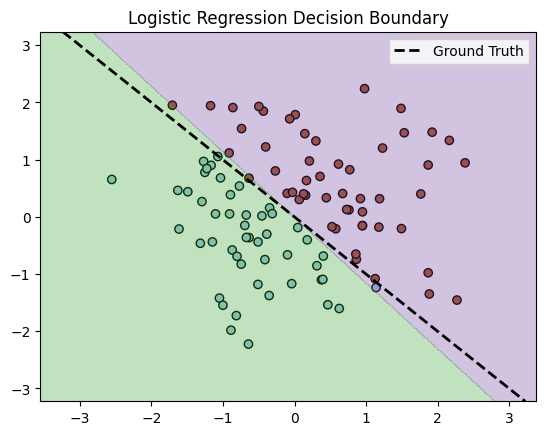

In [2]:
# Generate some example data
np.random.seed(0)
X = np.random.randn(100, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int)

# Instantiate and train the logistic regression model
model = LogisticRegression(learning_rate=0.01, num_iterations=1000)
model.gradient_descent(X, y)

# Predict and output accuracy
predictions = model.predict(X)
accuracy = np.mean(predictions == y)
print(f"Accuracy: {accuracy}")

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o', edgecolors='k')

# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot fitted decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.3, levels=[0, 0.5, 1])

# Plot actual decision boundary (ground truth)
actualZ = (xx + yy > 0).astype(int).reshape(xx.shape)
plt.contour(xx, yy, actualZ, alpha=1, linewidths=2, levels=[0.5], colors='k', linestyles='dashed')
custom_lines = [Line2D([0], [0], color='k', linestyle='dashed', linewidth=2, label='Ground Truth')]

plt.legend(handles=custom_lines)
plt.title('Logistic Regression Decision Boundary')
plt.show()